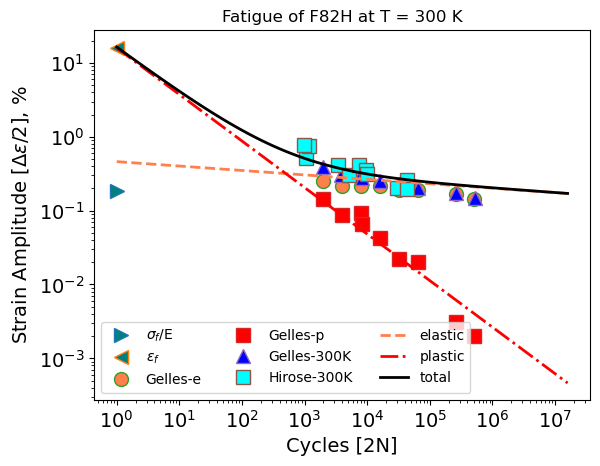

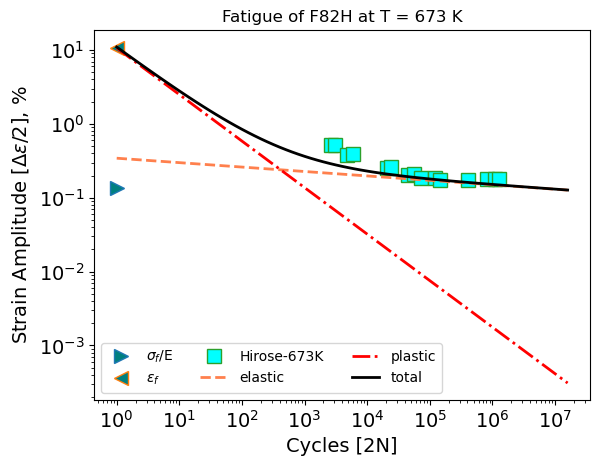

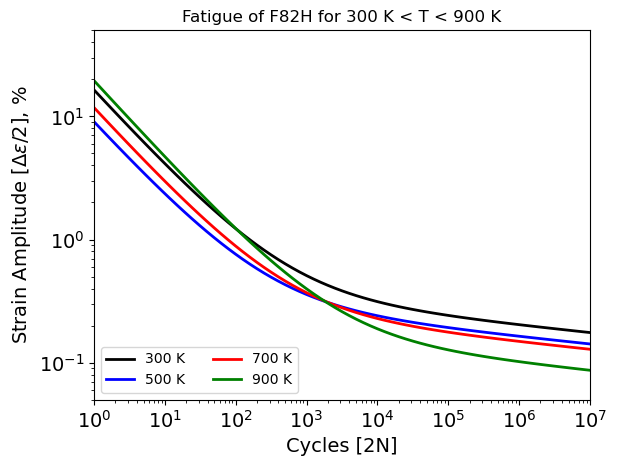

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%run Utilities_Indro.ipynb

excel_filename = 'F82H_Indro.xlsx'

fatigue_col_names = ["log10(Cycles [2N])_eT300", "log10(Strain amplitude)_eT300",\
                    "log10(Cycles [2N])_pT300", "log10(Strain amplitude)_pT300",\
                    "log10(Cycles [2N])_tT300", "log10(Strain amplitude)_tT300",\
                    "log10(Cycles [2N])_H_T300", "log10(Strain amplitude)_H_T300",\
                    "log10(Cycles [2N])_H_T573", "log10(Strain amplitude)_H_T573",\
                    "log10(Cycles [2N])_H_T673", "log10(Strain amplitude)_H_T673"]

fatigue_variables = ["log10_Cycles_eT300", "log10_Strain_eT300",\
                    "log10_Cycles_pT300", "log10_Strain_pT300",\
                    "log10_Cycles_tT300", "log10_Strain_tT300",\
                    "log10_Cycles_H_T300", "log10_Strain_H_T300",\
                    "log10_Cycles_H_T573", "log10_Strain_H_T573",\
                    "log10_Cycles_H_T673", "log10_Strain_H_T673"]

load_data(excel_filename, "Fatigue", fatigue_col_names, fatigue_variables)

msize = 10
fsize = 14

# Define functions
E = lambda T: 4.0761e11 - 3.5521e7 * T - 5.871e3 * T**2
e_tot = lambda T: 1e-2 * (62.09 - 0.2306 * T + 0.0003032 * T**2 - 1.082e-7 * T**3)
sig_u = lambda T: 1065 - 2.468 * T + 0.004087 * T**2 - 2.575e-6 * T**3
C = lambda T: 100 * np.log(1 + e_tot(T))
B = lambda T: 2.5 * (1 + e_tot(T)) * sig_u(T) * 1e8 / E(T)
b = -0.06
c = -0.63
del_eps_e = lambda T, n: B(T) * (n)**b
del_eps_p = lambda T, n: C(T) * (n)**c
del_eps_tot = lambda T, n: del_eps_e(T, n) + del_eps_p(T, n)

# Define data
n = np.arange(0, 7, 0.1)
N2 = 2 * 10**n - 1
eps300 = del_eps_tot(300, N2)
eps500 = del_eps_tot(500, N2)
eps700 = del_eps_tot(700, N2)
eps900 = del_eps_tot(900, N2)

# Plotting
plt.figure('Fatigue of F82H at T = 300 K')
plt.title('Fatigue of F82H at T = 300 K')
plt.loglog(1, B(300)/2.5, '>', markersize=msize, markerfacecolor=[0, 0.5, 0.5])
plt.loglog(1, C(300), '<', markersize=msize, markerfacecolor=[0, 0.5, 0.5])
plt.loglog(10**log10_Cycles_eT300, 10**log10_Strain_eT300, 'o', markersize=msize, markerfacecolor=[1, 0.5, 0.3])
plt.loglog(10**log10_Cycles_pT300, 10**log10_Strain_pT300, 's', markersize=msize, markerfacecolor='r')
plt.loglog(10**log10_Cycles_tT300, 10**log10_Strain_tT300, '^', markersize=msize, markerfacecolor='b')
plt.plot(10**log10_Cycles_H_T300, 0.5e2 * 10**log10_Strain_H_T300, 's', linewidth=2, markersize=msize, markerfacecolor=[0, 1, 1])
plt.loglog(N2, del_eps_e(300, N2), '--', linewidth=2, color=[1, 0.5, 0.3])
plt.loglog(N2, del_eps_p(300, N2), '-.', linewidth=2, color='r')
plt.loglog(N2, del_eps_tot(300, N2), linewidth=2, color='k')

plt.legend([r'$\sigma_f$/E', r'$\epsilon_f$', 'Gelles-e', 'Gelles-p', 'Gelles-300K', 'Hirose-300K', 'elastic', 'plastic', 'total'],
           loc='lower left', ncol=3, fontsize=msize)
plt.xlabel('Cycles [2N]', fontsize=fsize)
plt.ylabel(r'Strain Amplitude [$\Delta\epsilon/2$], %', fontsize=fsize)
plt.tick_params(axis='both', which='major', labelsize=fsize)


plt.figure('Fatigue of F82H at T = 673 K')
plt.title('Fatigue of F82H at T = 673 K')
plt.loglog(1, B(673)/2.5, '>', markersize=msize, markerfacecolor=[0, 0.5, 0.5])
plt.loglog(1, C(673), '<', markersize=msize, markerfacecolor=[0, 0.5, 0.5])
plt.plot(10**log10_Cycles_H_T673, 0.5e2 * 10**log10_Strain_H_T673, 's', linewidth=2, markersize=msize, markerfacecolor=[0, 1, 1])
plt.loglog(N2, del_eps_e(673, N2), '--', linewidth=2, color=[1, 0.5, 0.3])
plt.loglog(N2, del_eps_p(673, N2), '-.', linewidth=2, color='r')
plt.loglog(N2, del_eps_tot(673, N2), linewidth=2, color='k')

plt.legend([r'$\sigma_f$/E', r'$\epsilon_f$', 'Hirose-673K', 'elastic', 'plastic', 'total'],
           loc='lower left', ncol=3, fontsize=msize)
plt.xlabel('Cycles [2N]', fontsize=fsize)
plt.ylabel(r'Strain Amplitude [$\Delta\epsilon/2$], %', fontsize=fsize)
plt.tick_params(axis='both', which='major', labelsize=fsize)


plt.figure('Fatigue of F82H for 300 K < T < 900 K')
plt.title('Fatigue of F82H for 300 K < T < 900 K')
plt.loglog(N2, eps300, linewidth=2, color='k')
plt.loglog(N2, eps500, linewidth=2, color='b')
plt.loglog(N2, eps700, linewidth=2, color='r')
plt.loglog(N2, eps900, linewidth=2, color='g')

plt.legend(['300 K', '500 K', '700 K', '900 K'], loc='lower left', ncol=2, fontsize=msize)
plt.xlabel('Cycles [2N]', fontsize=fsize)
plt.ylabel(r'Strain Amplitude [$\Delta\epsilon/2$], %', fontsize=fsize)
plt.xlim([1, 1e7])
plt.ylim([5e-2, 5e1])
plt.tick_params(axis='both', which='major', labelsize=fsize)